In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import prince
from prince import plot
import seaborn as sns
import statsmodels.formula.api as smf
from mlxtend.plotting import plot_pca_correlation_graph

In [2]:
data = pd.read_csv("insurance_data.csv",header=0)
reg_data = data.drop(columns=["_c39"])
reg_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


**Description des données :**
Les données comprennent des informations sur les assurés, leurs polices d'assurance et les incidents d'assurance automobile. Voici une brève description des variables :

- `months_as_customer` : Nombre de mois en tant que client de l'assurance.
- `age` : Âge du client.
- `policy_number` : Numéro de police d'assurance.
- `policy_bind_date` : Date à laquelle la police a été souscrite.
- `policy_state` : État où la police d'assurance est souscrite.
- `policy_csl` : Limite unique combinée de la police.
- `policy_deductable` : Franchise de la police.
- `policy_annual_premium` : Prime annuelle de la police.
- `umbrella_limit` : Limite parapluie de la police.
- `insured_zip` : Code postal de l'assuré.
- `insured_sex` : Sexe de l'assuré.
- `insured_education_level` : Niveau d'éducation de l'assuré.
- `insured_occupation` : Profession de l'assuré.
- `insured_hobbies` : Loisirs de l'assuré.
- `insured_relationship` : Relation de l'assuré avec le titulaire de la police.
- `capital-gains` : Plus-values de l'assuré.
- `capital-loss` : Pertes en capital de l'assuré.
- `incident_date` : Date de l'incident.
- `incident_type` : Type d'incident.
- `collision_type` : Type de collision.
- `incident_severity` : Gravité de l'incident.
- `authorities_contacted` : Autorités contactées après l'incident.
- `incident_state` : État où l'incident s'est produit.
- `incident_city` : Ville où l'incident s'est produit.
- `incident_location` : Emplacement spécifique de l'incident.
- `incident_hour_of_the_day` : Heure de la journée à laquelle l'incident s'est produit.
- `number_of_vehicles_involved` : Nombre de véhicules impliqués dans l'incident.
- `property_damage` : Dommages matériels survenus lors de l'incident.
- `bodily_injuries` : Blessures corporelles survenues lors de l'incident.
- `witnesses` : Témoins de l'incident.
- `police_report_available` : Disponibilité du rapport de police après l'incident.
- `total_claim_amount` : Montant total de la réclamation.
- `injury_claim` : Montant de la réclamation pour blessures corporelles.
- `property_claim` : Montant de la réclamation pour dommages matériels.
- `vehicle_claim` : Montant de la réclamation pour dommages de véhicule.
- `auto_make` : Marque de la voiture assurée.
- `auto_model` : Modèle de la voiture assurée.
- `auto_year` : Année de fabrication de la voiture assurée.
- `fraud_reported` : Indicateur de fraude signalée.

Ces données peuvent être utilisées pour analyser les tendances, les facteurs de risque et les modèles de fraude dans le domaine de l'assurance automobile.

L'indication selon laquelle la fraude a été signalée signifie que l'assureur a reçu des informations ou des preuves suggérant qu'une fraude a été commise dans le cas d'assurance automobile associé. Cela peut inclure divers types de fraude, tels que :

 - Exagération des réclamations : L'assuré pourrait exagérer les dommages subis lors de l'incident pour obtenir une indemnisation plus élevée que ce qui est légitimement dû.
 - Fabrication d'incidents : L'assuré pourrait inventer un incident qui ne s'est pas réellement produit afin de déposer une réclamation frauduleuse.
 - Fraude à l'assurance par collision : L'assuré pourrait intentionnellement provoquer un accident de voiture pour déposer une réclamation frauduleuse.
 - Fraude d'identité : L'assuré pourrait utiliser des informations d'identification frauduleuses pour souscrire une police d'assurance ou déposer une réclamation.


Dans le monde de `l'assurance automobile`, où les risques sont omniprésents et les coûts imprévisibles, l'analyse des données offre une avenue prometteuse pour les compagnies d'assurance désireuses d'améliorer leur compréhension des risques et d'optimiser leurs opérations. En se plongeant dans un ensemble de données complet comprenant une variété de variables, des informations précieuses peuvent être extraites pour informer les décisions stratégiques et opérationnelles.

Une première étape cruciale dans cette démarche consiste à poser les bonnes questions. Pour cela, nous avons identifié plusieurs problématiques clés qui guideront notre analyse, chacune associée à une méthode d'analyse spécifique :

-  **_`Prédiction du montant total de la réclamation`_ :**
Nous tenterons de prédire le montant total de la réclamation en fonction des variables disponibles. Pour cela, nous utiliserons la méthode de régression, en cherchant à établir une relation entre les caractéristiques des incidents et le montant total réclamé.

- **_`Étude de la gravité des incidents`_ :**
Nous chercherons à déterminer quels facteurs influent sur les montants de la réclamation, soit de manière indépendante, soit de manière simultanée avec d'autres variables. Pour évaluer l'impact de chaque facteur indépendamment des autres, nous utiliserons l'ANOVA à un facteur (ANOVA1). En parallèle, pour évaluer l'impact de deux facteurs simultanément, nous utiliserons l'ANOVA à deux facteurs (ANOVA2), qui permet de prendre en compte l'interaction entre deux variables explicatives. En appliquant ces deux méthodes aux différentes variables explicatives par rapport au montant total de la réclamation, nous pourrons identifier les facteurs qui ont un impact significatif sur le montant total de la réclamation, que ce soit de manière indépendante ou simultanée.

- **_`la segmentation des clients`_:**
Dans le cadre de l'analyse des données dans le secteur de l'assurance automobile, nous cherchons à comprendre les caractéristiques et les comportements des clients afin de mieux les segmenter pour une offre et un service plus adaptés, la problèmatique est 
**_`Comment pouvons-nous utiliser les caractéristiques démographiques, les comportements des clients et les variables liées aux incidents pour segmenter de manière efficace la clientèle de l'assurance automobile, afin de proposer des offres personnalisées et adaptées à chaque segment de clients`_ ?**
Nous explorerons l'existence de segments distincts de clients en fonction de leurs caractéristiques démographiques et comportementales. Pour cela, nous utiliserons des méthodes telles que l'ACP (Analyse en composantes principales) ou l'ACM (Analyse des correspondances multiples). Ces méthodes permettent de réduire la dimensionnalité des données tout en préservant au mieux les informations pertinentes, ce qui facilite l'identification des patterns ou des regroupements naturels parmi les clients.

- **_`Comment identifier les caractéristiques qui permettent de discriminer entre les clients ayant des réclamations élevées, moyennes et faibles dans le secteur de l'assurance automobile`_**, afin de mieux comprendre les facteurs associés aux différents niveaux de réclamation et de personnaliser les offres et les services pour chaque segment de clientèle ?
Nous utiliserons l'Analyse Factorielle Discriminante (AFD) pour explorer les relations entre les différentes variables et pour déterminer les principales caractéristiques discriminantes entre les clients ayant des niveaux de réclamation élevés, moyens et faibles.

## Comment les caractéristiques des assurés et les détails des incidents d'assurance automobile sont-ils liés au montant total des réclamations ?


`L'objectif de cette analyse est de comprendre comment les différentes caractéristiques des assurés, telles que l'âge, la prime annuelle de la police, les pertes en capital, ainsi que les détails des incidents d'assurance automobile, tels que le type d'incident, la gravité de l'incident, sont associés au montant total des réclamations. Nous cherchons à identifier les facteurs qui ont un impact significatif sur le montant des réclamations, afin de mieux comprendre les coûts associés aux réclamations d'assurance automobile et de développer des stratégies pour les gérer de manière efficace. En utilisant une approche de régression, nous visons à établir des relations quantitatives entre ces variables, ce qui nous permettra de prédire avec précision le montant total des réclamations en fonction des caractéristiques des assurés et des détails des incidents. Cette analyse peut également contribuer à la détection et à la prévention de la fraude en identifiant les schémas inhabituels ou frauduleux dans les réclamations d'assurance automobile.`

## Traitement des données pour la régression

In [3]:
# Utiliser la fonction get_dummies de Pandas pour l'encodage one-hot des variables incident_type, incident_severity, incident_type et insured_sex
incident_severity_encoded = pd.get_dummies(reg_data['incident_severity'], prefix='incident_severity')
incident_type_encoded = pd.get_dummies(reg_data['incident_type'], prefix='incident_type')
insured_sex_encoded = pd.get_dummies(reg_data['insured_sex'], prefix='insured_sex')

# Joindre les données encodées à votre DataFrame d'origine
reg_data = pd.concat([reg_data, insured_sex_encoded], axis=1)
reg_data = pd.concat([reg_data, incident_severity_encoded], axis=1)
reg_data = pd.concat([reg_data, incident_type_encoded], axis=1)
reg_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_state                            1000 non-null   object 
 5   policy_csl                              1000 non-null   object 
 6   policy_deductable                       1000 non-null   int64  
 7   policy_annual_premium                   1000 non-null   float64
 8   umbrella_limit                          1000 non-null   int64  
 9   insured_zip                             1000 non-null   int64  
 10  insured_sex                             1000 non-null   objec

In [4]:
# Sélectionner uniquement les variables quantitatives
quantitative_vars = reg_data.select_dtypes(include=['int64', 'float64','uint8'])

# Diviser les données en variables indépendantes (X) et dépendante (y)
X = quantitative_vars.drop(columns=["total_claim_amount","policy_number","insured_zip","injury_claim","property_claim","vehicle_claim"])
y = reg_data["total_claim_amount"]

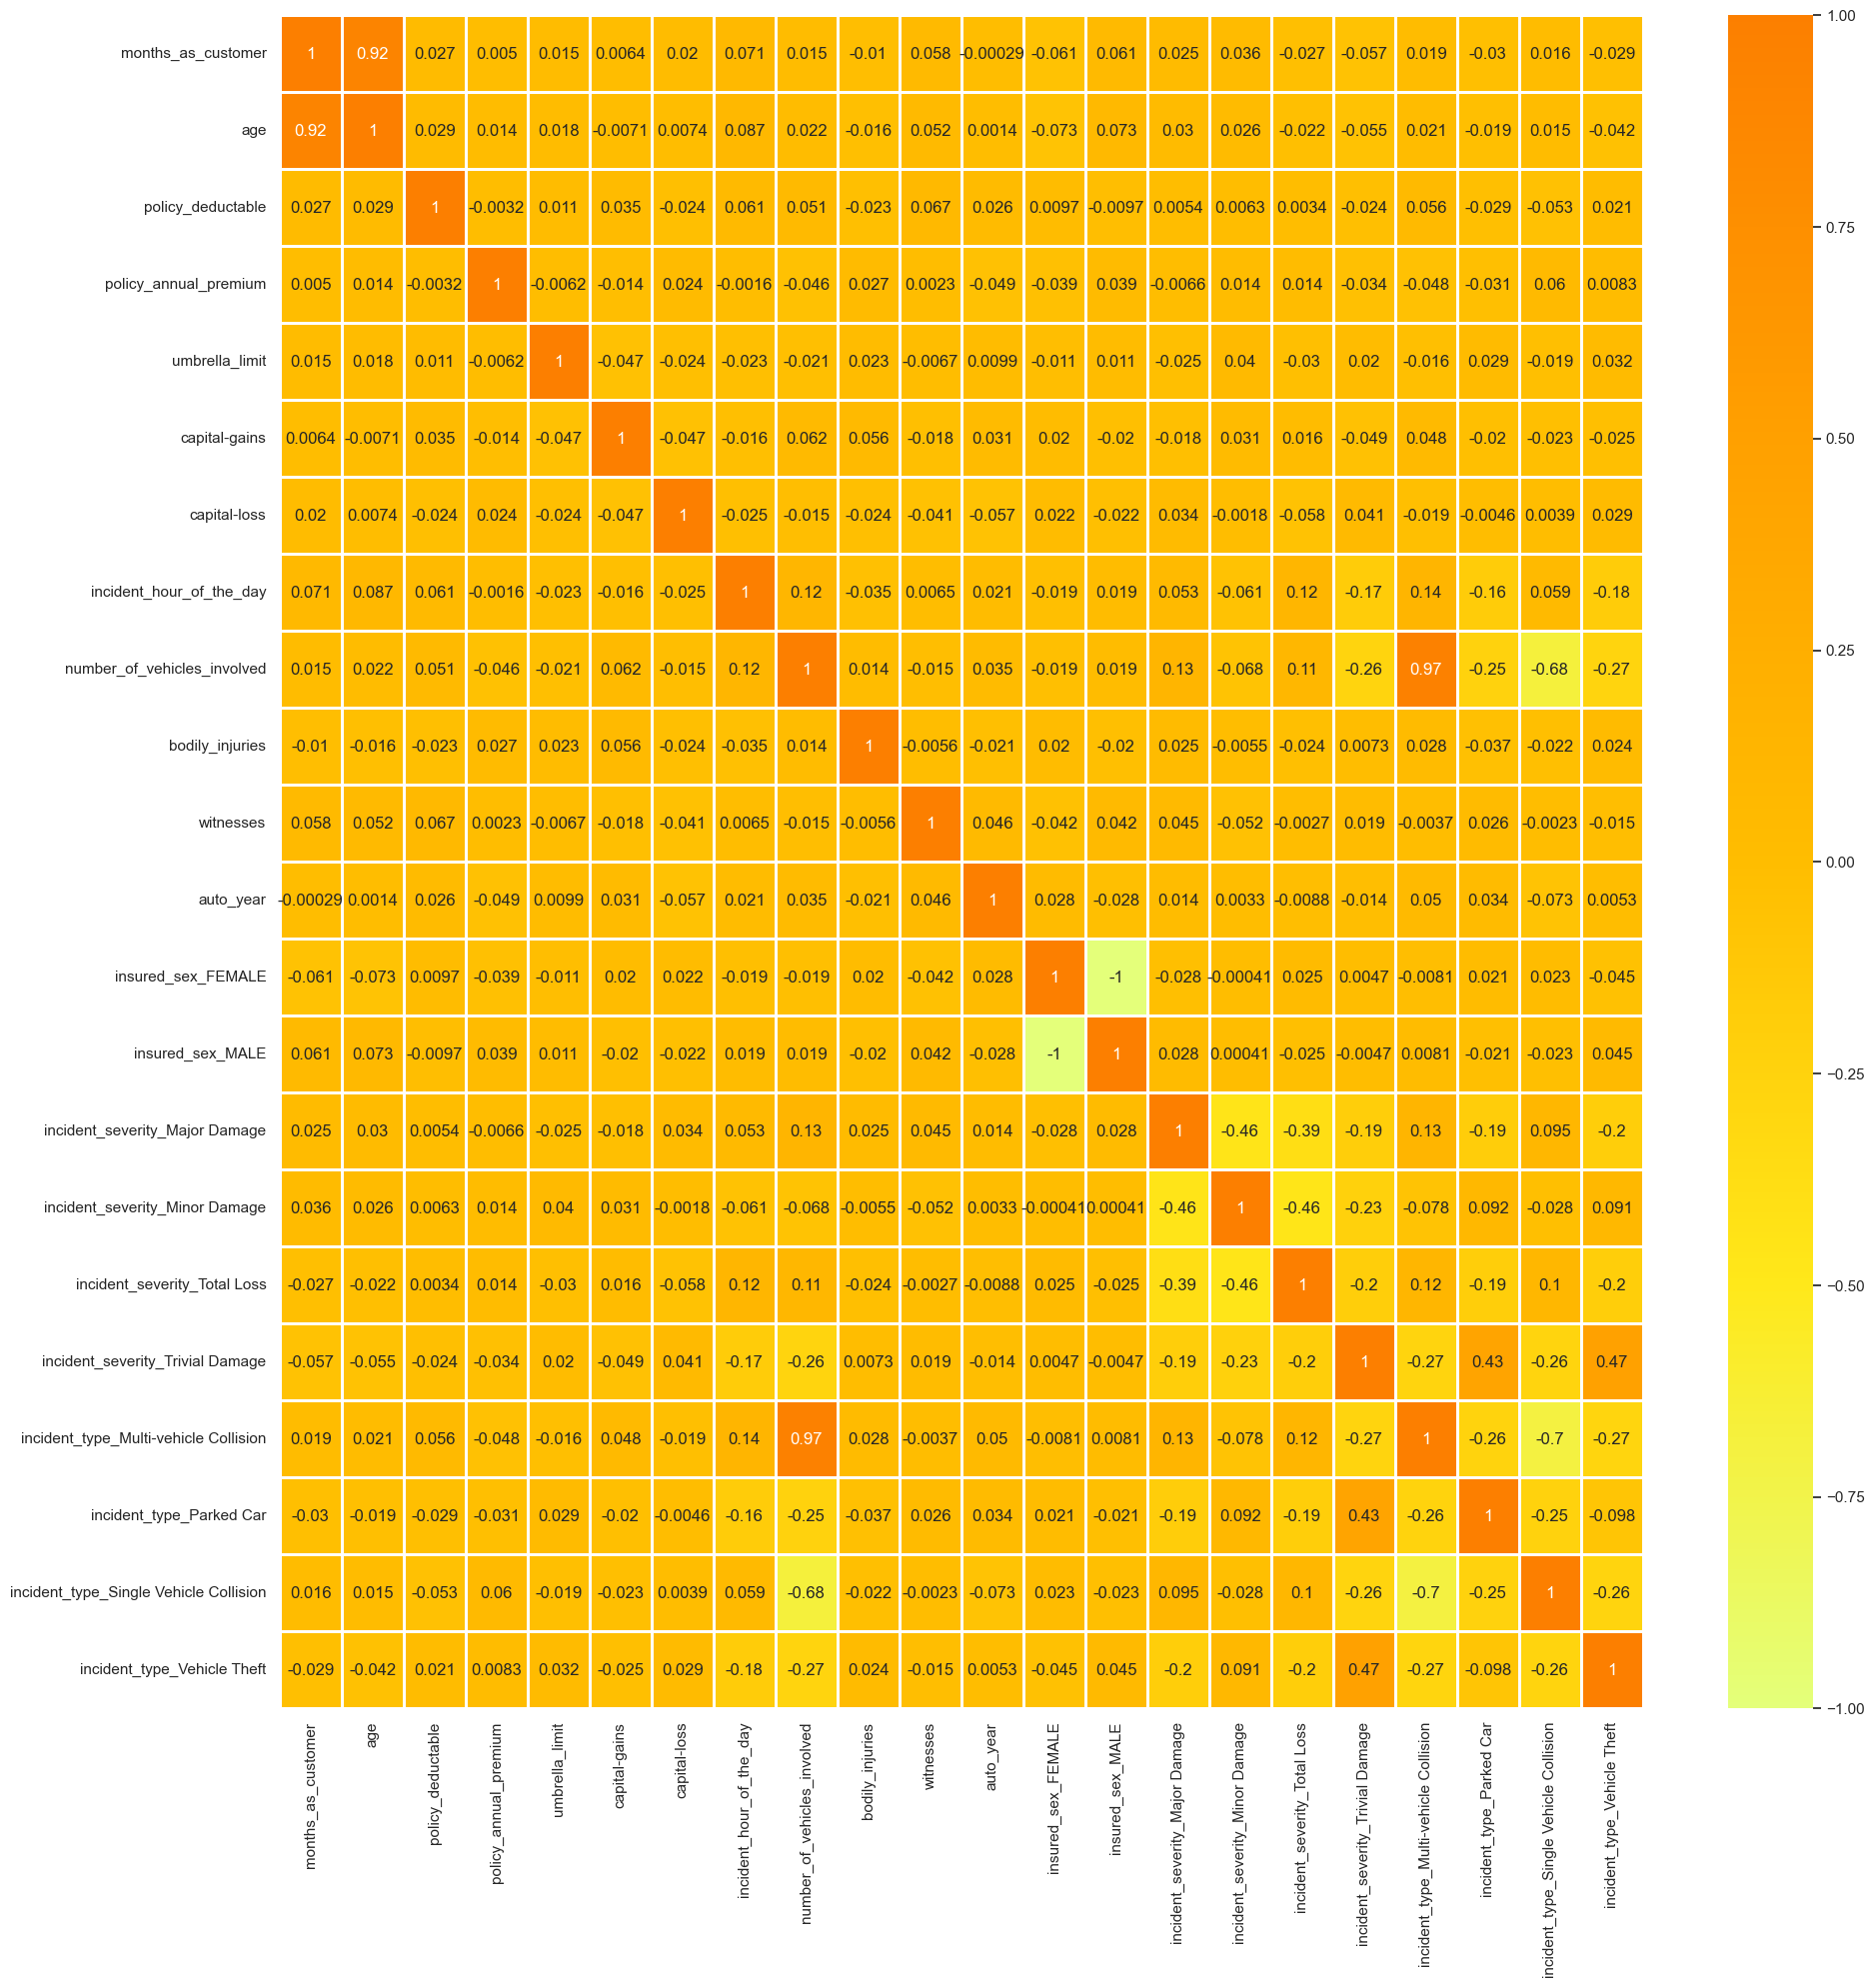

In [5]:
# correlation plot
corr = X.corr()
sns.set (rc = {'figure.figsize':(22, 22)})
sns.heatmap(corr, cmap = 'Wistia', annot= True,linewidths=.9)
plt.show()

In [6]:
X1 = X.drop(columns=["age","number_of_vehicles_involved"])

In [7]:
X2=sm.add_constant(X1)
# Create a fitted model
lm = sm.OLS(y,X2).fit()

# Print model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     137.3
Date:                Thu, 23 May 2024   Prob (F-statistic):          2.45e-245
Time:                        12:33:54   Log-Likelihood:                -10991.
No. Observations:                1000   AIC:                         2.202e+04
Df Residuals:                     982   BIC:                         2.211e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [8]:
X1

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,bodily_injuries,witnesses,auto_year,insured_sex_FEMALE,insured_sex_MALE,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,328,1000,1406.91,0,53300,0,5,1,2,2004,0,1,1,0,0,0,0,0,1,0
1,228,2000,1197.22,5000000,0,0,8,0,0,2007,0,1,0,1,0,0,0,0,0,1
2,134,2000,1413.14,5000000,35100,0,7,2,3,2007,1,0,0,1,0,0,1,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,2,2014,1,0,1,0,0,0,0,0,1,0
4,228,1000,1583.91,6000000,66000,-46000,20,0,1,2009,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,0,1,2006,1,0,0,1,0,0,0,0,1,0
996,285,1000,1436.79,0,70900,0,23,2,3,2015,1,0,1,0,0,0,0,0,1,0
997,130,500,1383.49,3000000,35100,0,4,2,3,1996,1,0,0,1,0,0,1,0,0,0
998,458,2000,1356.92,5000000,0,0,2,0,1,1998,0,1,1,0,0,0,0,0,1,0


In [21]:
# Exemple de nouvelles données pour prédiction
new_data = {
    'const':[1],
    'months_as_customer': [400],
    'policy_deductable': [800],
    'policy_annual_premium': [1500.50],
    'umbrella_limit': [1],
    'capital-gains': [20000],
    'capital-loss': [100],
    'incident_hour_of_the_day': [10],
    'bodily_injuries': [0],
    'witnesses': [1],
    'auto_year': [2010],
    'insured_sex_FEMALE': [1],
    'insured_sex_MALE': [0],
    'incident_severity_Major Damage': [0],
    'incident_severity_Minor Damage': [1],
    'incident_severity_Total Loss': [0],
    'incident_severity_Trivial Damage': [0],
    'incident_type_Multi-vehicle Collision': [1],
    'incident_type_Parked Car': [0],
    'incident_type_Single Vehicle Collision': [0],
    'incident_type_Vehicle Theft': [0]
}

# Convertir les nouvelles données en DataFrame
new_X = pd.DataFrame(new_data)

# Faire la prédiction
predicted_claim = lm.predict(new_X)[0]


In [22]:
from prettytable import PrettyTable
#Afficher les nouvelles données d'exemple et le résultat de la prédiction
table = PrettyTable()
table.field_names = ["Variable", "Valeur"]
for key, value in new_data.items():
    table.add_row([key, value[0]])

print("Nouvelles données d'exemple:")
print(table)
print("\nRésultat de la prédiction:")
print(f"Le montant total de la réclamation prédit est: {predicted_claim:.2f}")

# Commentaire
print("\nCommentaire:")
print("Le montant total de la réclamation prédit, basé sur les caractéristiques fournies, est de {:.2f}. Ce montant est obtenu en appliquant les coefficients du modèle de régression aux valeurs des caractéristiques de l'assuré.".format(predicted_claim))

Nouvelles données d'exemple:
+----------------------------------------+--------+
|                Variable                | Valeur |
+----------------------------------------+--------+
|                 const                  |   1    |
|           months_as_customer           |  400   |
|           policy_deductable            |  800   |
|         policy_annual_premium          | 1500.5 |
|             umbrella_limit             |   1    |
|             capital-gains              | 20000  |
|              capital-loss              |  100   |
|        incident_hour_of_the_day        |   10   |
|            bodily_injuries             |   0    |
|               witnesses                |   1    |
|               auto_year                |  2010  |
|           insured_sex_FEMALE           |   1    |
|            insured_sex_MALE            |   0    |
|     incident_severity_Major Damage     |   0    |
|     incident_severity_Minor Damage     |   1    |
|      incident_severity_Total Loss

# Étude de la gravité des incidents
- ## Nous chercherons à déterminer quels facteurs influent sur les montants de la réclamation, soit de manière indépendante, soit de manière simultanée avec d'autres variables

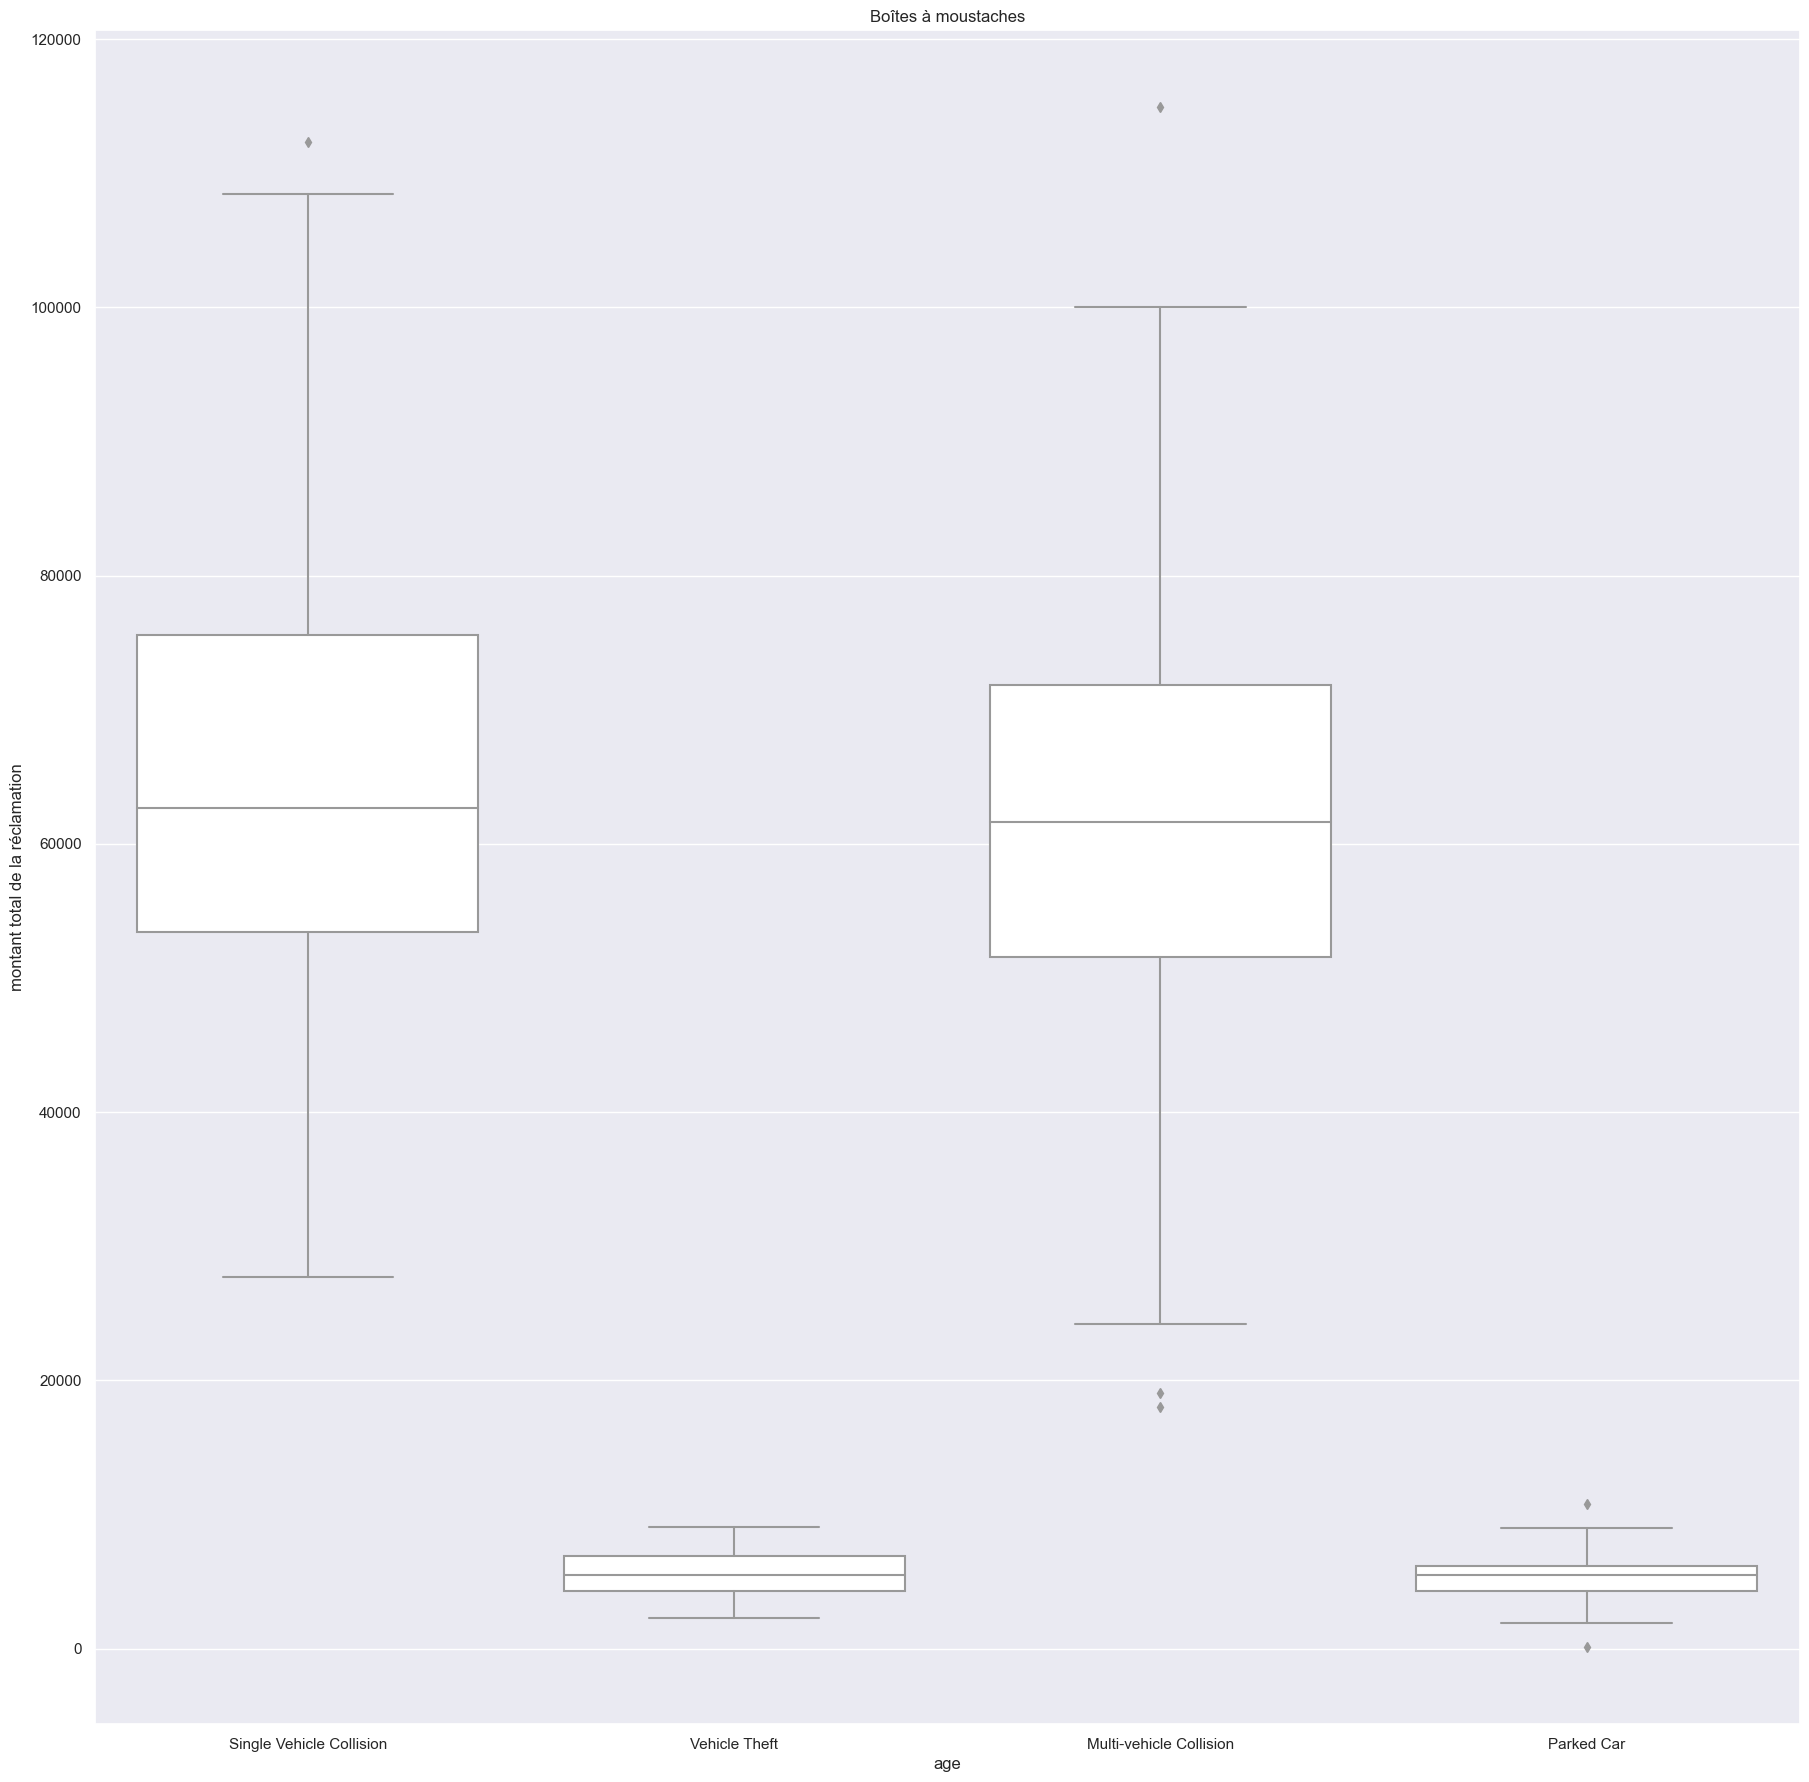

In [23]:
sns.set()

ax = sns.boxplot(x="incident_type", y="total_claim_amount", data=data, color='white')
plt.xlabel('age')
plt.ylabel('montant total de la réclamation')
plt.title('Boîtes à moustaches')
plt.show()

- D'après le graphique, il semble y avoir une variation significative dans le montant total des règlements en fonction du type d'accident. Pour confirmer cette observation et évaluer s'il existe une influence réelle, nous allons utiliser le modèle ANOVA à un facteur.

In [24]:
anova_age = smf.ols('total_claim_amount~incident_type', data=data).fit()
sm.stats.anova_lm(anova_age)

,df,sum_sq,mean_sq,F,PR(>F)
incident_type,3.0,4.869845e+11,1.623282e+11,772.254946,2.524393e-259
Residual,996.0,2.093594e+11,2.102002e+08,NaN,NaN


### `intrepretation:`
- La p-value est inférieure à 0,05, ce qui indique qu'il existe une influence significative du type d'accident sur le montant total des réclamations.

## ANOVA2 sans interaction

In [25]:
anova__ = smf.ols('injury_claim~auto_make+incident_type', data=data).fit()
sm.stats.anova_lm(anova__)

,df,sum_sq,mean_sq,F,PR(>F)
auto_make,13.0,1.937809e+08,1.490623e+07,1.048468,4.017241e-01
incident_type,3.0,9.630629e+09,3.210210e+09,225.798429,2.044595e-111
Residual,983.0,1.397546e+10,1.421715e+07,NaN,NaN


- D'après la sortie ci-dessus, nous pouvons conclure que la marque de la voiture assurée et le type d'accident ont une influence sur le montant de la réclamation pour blessures corporelles.

## ANOVA 2 avec interaction(même exemple)

In [26]:
anova__ = smf.ols('injury_claim~auto_make*incident_type', data=data).fit()
sm.stats.anova_lm(anova__)

,df,sum_sq,mean_sq,F,PR(>F)
auto_make,13.0,1.937809e+08,1.490623e+07,1.020453,4.286836e-01
incident_type,3.0,9.630629e+09,3.210210e+09,219.765158,4.147990e-108
auto_make:incident_type,39.0,1.860189e+08,4.769715e+06,0.326526,9.999743e-01
Residual,944.0,1.378944e+10,1.460746e+07,NaN,NaN


### `intrepretation:`
- Les valeurs de p-value inférieures à 0,05 indiquent une influence significative de la marque de la voiture et du type d'accident sur le montant des réclamations pour blessures corporelles. De plus, la valeur de p-value pour l'interaction est supérieure à 0,05, ce qui signifie qu'il n'y a pas d'influence significative due à l'interaction entre la marque de la voiture et le type d'accident sur le montant des réclamations pour blessures corporelles.

## Un autre exemple

In [27]:
anova___ = smf.ols('property_claim~number_of_vehicles_involved*police_report_available', data=data).fit()
sm.stats.anova_lm(anova___)

,df,sum_sq,mean_sq,F,PR(>F)
police_report_available,2.0,4.049758e+07,2.024879e+07,0.910891,4.025012e-01
number_of_vehicles_involved,1.0,1.111172e+09,1.111172e+09,49.986005,2.914493e-12
number_of_vehicles_involved:police_report_available,2.0,6.759770e+06,3.379885e+06,0.152044,8.589705e-01
Residual,994.0,2.209628e+10,2.222965e+07,NaN,NaN


### `intrepretation:`
- Les valeurs de p-value inférieures à 0,05 indiquent une influence significative de  Disponibilité du rapport de police après l'incident et  le nombre de véhicules impliqués dans l'incident  sur  Montant de la réclamation pour dommages matériels . De plus, la valeur de p-value pour l'interaction est supérieure à 0,05, ce qui signifie qu'il n'y a pas d'influence significative due à l'interaction entre  Disponibilité du rapport de police après l'incident  et le nombre de véhicules impliqués dans l'incident  sur Montant de la réclamation pour dommages matériels .

# Comment pouvons-nous utiliser les caractéristiques démographiques, les comportements des clients et les variables liées aux incidents pour segmenter de manière efficace la clientèle de l'assurance automobile, afin de proposer des offres personnalisées et adaptées à chaque segment de clients

## ACP

In [28]:
variables_selectionnees = ['policy_annual_premium', 'total_claim_amount', 'capital-gains', 'capital-loss', 'policy_deductable','injury_claim','property_claim','vehicle_claim']
data1=data[variables_selectionnees].copy()
data1

,policy_annual_premium,total_claim_amount,capital-gains,capital-loss,policy_deductable,injury_claim,property_claim,vehicle_claim
0,1406.91,71610,53300,0,1000,6510,13020,52080
1,1197.22,5070,0,0,2000,780,780,3510
2,1413.14,34650,35100,0,2000,7700,3850,23100
3,1415.74,63400,48900,-62400,2000,6340,6340,50720
4,1583.91,6500,66000,-46000,1000,1300,650,4550
...,...,...,...,...,...,...,...,...
995,1310.80,87200,0,0,1000,17440,8720,61040
996,1436.79,108480,70900,0,1000,18080,18080,72320
997,1383.49,67500,35100,0,500,7500,7500,52500
998,1356.92,46980,0,0,2000,5220,5220,36540


### `Préparation des données pour l'ACP`

(1000, 8)


array([[<Axes: xlabel='policy_annual_premium', ylabel='policy_annual_premium'>,
        <Axes: xlabel='total_claim_amount', ylabel='policy_annual_premium'>,
        <Axes: xlabel='capital-gains', ylabel='policy_annual_premium'>,
        <Axes: xlabel='capital-loss', ylabel='policy_annual_premium'>,
        <Axes: xlabel='policy_deductable', ylabel='policy_annual_premium'>,
        <Axes: xlabel='injury_claim', ylabel='policy_annual_premium'>,
        <Axes: xlabel='property_claim', ylabel='policy_annual_premium'>,
        <Axes: xlabel='vehicle_claim', ylabel='policy_annual_premium'>],
       [<Axes: xlabel='policy_annual_premium', ylabel='total_claim_amount'>,
        <Axes: xlabel='total_claim_amount', ylabel='total_claim_amount'>,
        <Axes: xlabel='capital-gains', ylabel='total_claim_amount'>,
        <Axes: xlabel='capital-loss', ylabel='total_claim_amount'>,
        <Axes: xlabel='policy_deductable', ylabel='total_claim_amount'>,
        <Axes: xlabel='injury_claim', ylabel='

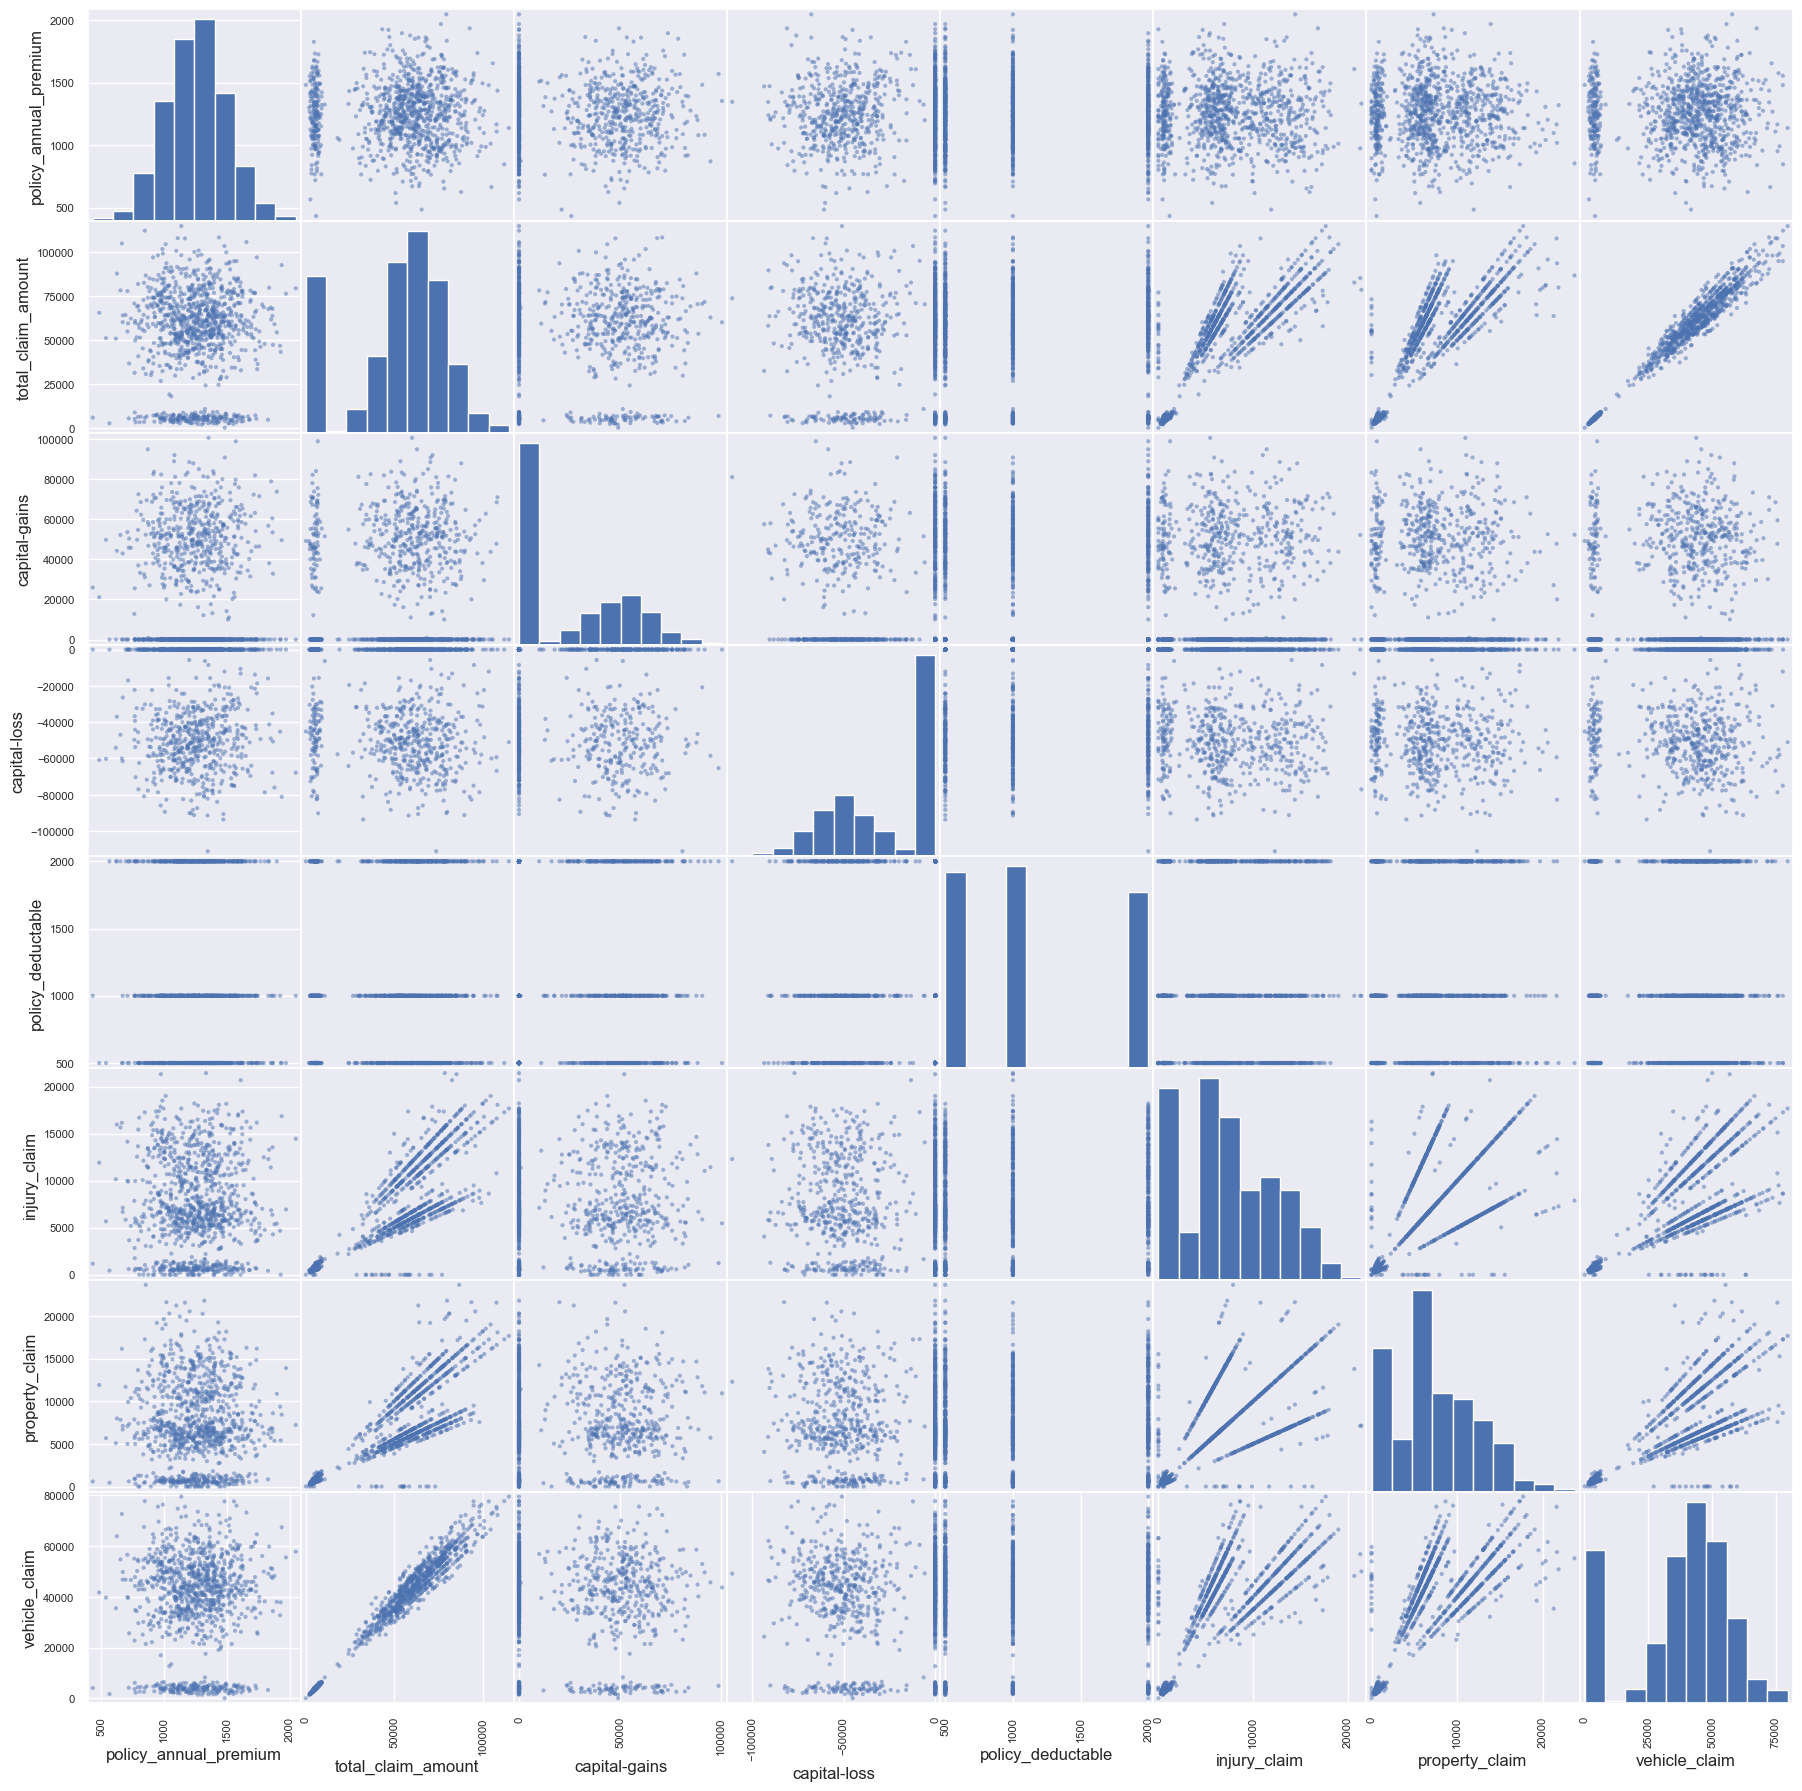

In [29]:
#utilisée pour standardiser les caractéristiques d'un ensemble de données.
from sklearn.preprocessing import StandardScaler
#instanciation(création d'une instance spécifique d'une classe)
sc = StandardScaler()
#transformation – centrage-réduction(standardisé les données)
Z = sc.fit_transform(data1)
#verifié dimensien 
print(Z.shape)
#Matrice de nuage(par exemple la premiere ligne  afiche les nuage de points de variabla 1 par rapports a les autres variables)
pd.plotting.scatter_matrix(data1)

- Les données ont été normalisées et centrées afin que le centre de gravité (G) soit situé à l'origine, et ce dans le but de rendre les variables comparables.

In [30]:
#classe pour l'ACP(utiliser class PCA dans bibliotique sklearn.decomposition)
from sklearn.decomposition import PCA
#instanciation
acp = PCA()
#Coordonées dans le nouvel espace(projecter les données precedantes dans un nouvel espace )
coord = acp.fit_transform(Z)
print(coord)
import matplotlib.pyplot as plt

[[ 1.21260656e+00 -3.09555414e-01 -7.06353489e-01 ...  9.68176590e-01
   8.94389306e-02 -2.07876466e-16]
 [-3.20431206e+00 -2.50010201e-01 -5.62112537e-01 ... -1.07408277e-01
  -1.41296303e-01  4.64782489e-16]
 [-1.08386581e+00  1.63791778e-01 -1.46933104e+00 ... -6.31906232e-01
  -2.62633283e-01  6.76069708e-17]
 ...
 [ 6.68598265e-01 -1.01622688e+00 -7.03242874e-02 ...  3.89012665e-02
   5.33268517e-01 -5.00705988e-17]
 [-5.79570346e-01 -5.80037596e-01 -1.06623181e+00 ... -9.11246728e-02
   4.26486032e-01 -2.32068036e-17]
 [-3.26279457e+00 -4.23482924e-01  1.74389528e+00 ...  2.65166064e-02
  -1.44737452e-01  1.41959883e-16]]


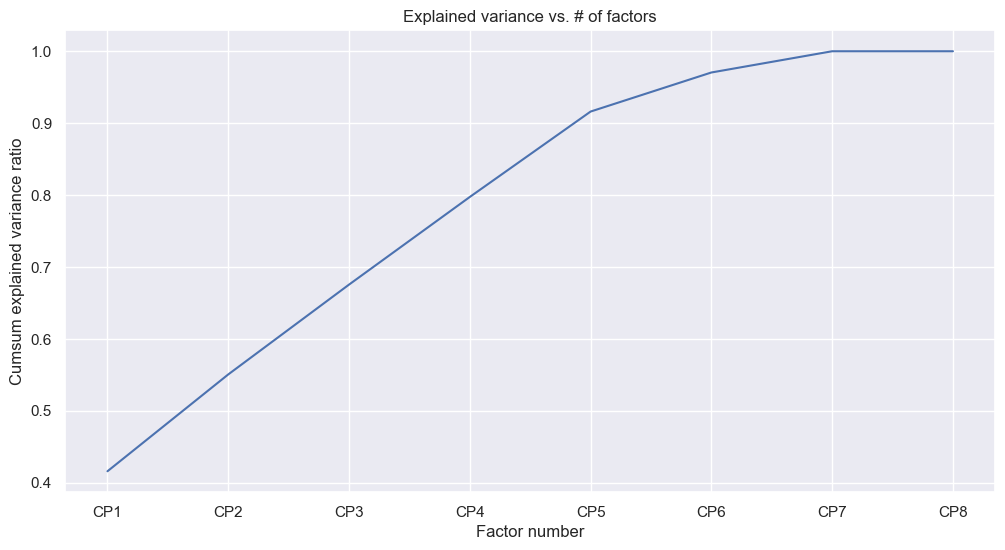

array([4.1599e-01, 1.3464e-01, 1.2491e-01, 1.2186e-01, 1.1875e-01,
       5.4324e-02, 2.9527e-02, 1.7100e-33])

In [58]:
### import matplotlib.pyplot as plt
import numpy as np

#cumul de variance expliquée
list_acp = ["CP1","CP2","CP3","CP4","CP5","CP6","CP7","CP8"]
plt.figure(figsize=(12, 6))

plt.plot(list_acp,np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()
acp.explained_variance_ratio_

### `intrepretation`
- Le ratio de variance expliquée dans l'analyse en composantes principales (ACP) indique la proportion de la variance totale de  données expliquée par chaque composante principale 
par exemple :
- La première composante principale explique 41.60% de la variance totale des données.
- La deuxième composante principale explique 13.46% de la variance totale, et ainsi de suite

# individus

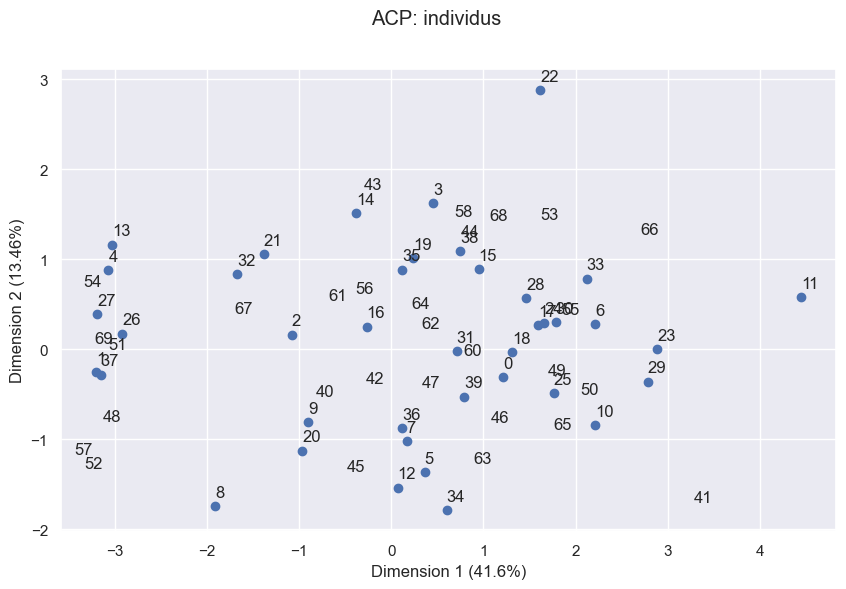

In [66]:
# plotting scatter plot
num_points = 40
selected_coord = coord[:num_points, :]
plt.figure(figsize=(10, 6))

plt.scatter(selected_coord[:,0],selected_coord[:,1])
#pourcentage des axes
pr1=acp.explained_variance_ratio_[0]/np.sum(acp.explained_variance_ratio_)
pr1=round(pr1*100,2)
pr2=acp.explained_variance_ratio_[1]/np.sum(acp.explained_variance_ratio_)
pr2=round(pr2*100,2)


# Loop for annotation of all points
for i in range(len(coord)-930):
   plt.annotate(data1.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 ({}%)".format(pr1)) # modification du nom de l'axe X
plt.ylabel("Dimension 2 ({}%)".format(pr2)) # idem pour axe Y
plt.suptitle("ACP: individus") # titre général
plt.show()

# intrepretation :
- Les assurées  7 et 36 sont proches l'un de l'autre dans l'espace des composantes principales, ce qui suggère une similarité dans leurs caractéristiques.
- De même, les assurées 32 et 21, ainsi que 4 et 13, sont également proches l'un de l'autre, ce qui indique des similitudes dans leurs caractéristiques .
- Les assurées 11 et 8, ainsi que 41 et 22, sont très éloignés l'un de l'autre dans l'espace des composantes principales, suggérant des différences significatives dans leurs caractéristiques .
-  les assurées 57 et 66 sont également très éloignés les uns des autres, ce qui souligne la différence  importantes entre eux.

### `contributions aux axes` 

In [33]:
#contributions aux axes 

ctr = coord**2
for j in range(8):
    ctr[:,j] = ctr[:,j]/np.sum(ctr[:,j])

df_ctr_cp1cp2 = pd.DataFrame({'id':data1.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df_ctr_cp1cp2

,id,CTR_1,CTR_2
0,0,0.000442,8.896617e-05
1,1,0.003085,5.803147e-05
2,2,0.000353,2.490762e-05
3,3,0.000062,2.456553e-03
4,4,0.002839,7.146023e-04
...,...,...,...
995,995,0.001699,1.625800e-03
996,996,0.005117,8.492908e-07
997,997,0.000134,9.588032e-04
998,998,0.000101,3.123636e-04


In [34]:
# Calculate contributions to axes
ctr = coord**2
for j in range(8):  # Adjust '8' based on the number of axes in your PCA
    ctr[:, j] = ctr[:, j] / np.sum(ctr[:, j])

# Create DataFrame for contributions to first two axes
df_ctr_cp1cp2 = pd.DataFrame({'id': data1.index, 'CTR_1': ctr[:, 0], 'CTR_2': ctr[:, 1]})

# Sort contributions by the first axis (descending order) and display the top contributors
sorted_contributions_0 = df_ctr_cp1cp2.sort_values(by='CTR_1', ascending=False)
top_contributors_0 = sorted_contributions_0.head()
top_contributors_0.style.format({'CTR_1': '{:.0%}', 'CTR_2': '{:.0%}'})


,id,CTR_1,CTR_2
11,11,1%,0%
149,149,1%,0%
996,996,1%,0%
479,479,0%,0%
565,565,0%,1%


In [35]:
# Sort contributions by the second axis (descending order) and display the top contributors
sorted_contributions_1 = df_ctr_cp1cp2.sort_values(by='CTR_2', ascending=False)
top_contributors_1 = sorted_contributions_1.head()
top_contributors_1.style.format({'CTR_1': '{:.0%}', 'CTR_2': '{:.0%}'})

,id,CTR_1,CTR_2
807,807,0%,1%
59,59,0%,1%
22,22,0%,1%
533,533,0%,1%
747,747,0%,1%


### `intrepretation:`
- Les pourcentages de contribution des individus aux deux premières composantes principales indiquent l'importance de chaque individu dans la formation de ces composantes dans une analyse en composantes principales (ACP). 

- Pour la première composante principale (1), les individus qui contribuent le plus sont :
  - l'individu 11  avec 1% : Cet individu est fortement associée à la première composante principale.
  - l'individu 149 avec 1% : Cet individu contribue également de manière significative à la première composante principale.

- Pour la deuxième composante principale (1), les individus qui contribuent le plus sont :
  - l'individu 807 avec 1% : Cet individu est fortement associée à la deuxième composante principale.
  -  l'individu 59 avec 1% : Cet individu contribue également de manière significative à la deuxiéme composante principale.

En résumé, ces pourcentages de contribution indiquent quelles individus  de variables ont le plus d'impact sur chaque composante principale, ce qui nous aide à comprendre les dimensions principales qui structurent les données dans l'analyse ACP.

# variables :

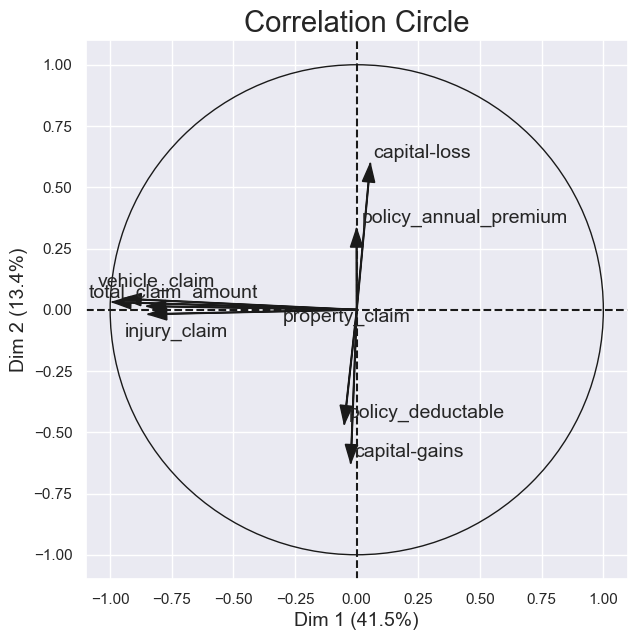

In [56]:
figure, correlation_matrix = plot_pca_correlation_graph(Z, 
                                                        data1.columns.values,
                                                        dimensions=(1, 2),
                                                    figure_axis_size=7)

# intrepretation :
 - L'interprétation des pourcentages affichés sur le graphe ci-dessus est la suivante :

- 41,5 % représente la part de la variance expliquée par la première composante principale par rapport à la variance totale.
- 13,4 % représente la part de la variance expliquée par la deuxième composante principale par rapport à la variance totale.
- Dans le cercle des corrélations, dont le rayon est de 1, l'axe des abscisses représente la première dimension d'inertie (dim 1, également appelée la première composante principale), tandis que l'axe des ordonnées représente la deuxième dimension d'inertie (dim 2).

- À l'intérieur du cercle, des flèches (représentant les variables) partent du centre. Leur taille varie, et elles peuvent atteindre le cercle sans le dépasser. Cela s'explique par le fait que les données sont centrées et réduites, comme c'est le cas ici.

- Les variables les plus corrélées à F1 (dim 1) sont :

- total_claim_amount (corrélation négative)
- injury_claim (corrélation négative)
- property_claim (corrélation négative)
- vehicle_claim (corrélation négative)
- Il est logique que ces variables soient fortement corrélées car total_claim_amount est la somme des trois autres variables (injury_claim, property_claim et vehicle_claim).

- Les variables les plus corrélées à F2 (dim 2) sont :

- capital-gains (corrélation négative)
- policy_deductable (corrélation négative)
- capital-loss (corrélation positive)
- Par exemple, pour la variable capital-gains, on comprend que plus les gains sont élevés, moins les pertes sont importantes.

- La longueur de la flèche pour la variable policy_annual_premium est très courte, ce qui indique une faible corrélation avec F1 et F2. Cependant, elle pourrait être plus fortement corrélée avec d'autres composantes, telles que F3, F4, F5, etc.

# AFC

In [37]:
NVvariable=['incident_type', 'incident_severity']
data3=data[NVvariable].copy()
data3

,incident_type,incident_severity
0,Single Vehicle Collision,Major Damage
1,Vehicle Theft,Minor Damage
2,Multi-vehicle Collision,Minor Damage
3,Single Vehicle Collision,Major Damage
4,Vehicle Theft,Minor Damage
...,...,...
995,Single Vehicle Collision,Minor Damage
996,Single Vehicle Collision,Major Damage
997,Multi-vehicle Collision,Minor Damage
998,Single Vehicle Collision,Major Damage


In [38]:
# Assurez-vous que vos variables sont de type catégorie
data3["incident_type"] =data3["incident_type"].astype('category')
data3["incident_severity"] =data3["incident_severity"].astype('category')

# Création du tableau de contingence
data3 = pd.crosstab(data3['incident_type'], data3['incident_severity'])

data3

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


In [39]:
from scipy.stats import chi2_contingency

# Test du chi carré d'indépendance
chi2, p, dof, expected = chi2_contingency(data3)

# Affichage des résultats
print("Test du chi carré d'indépendance :")
print(f"Valeur du chi carré : {chi2}")
print(f"P-value : {p}")
print(f"Degrés de liberté : {dof}")
print("Fréquences attendues dans chaque cellule du tableau de contingence :")
print(expected)

Test du chi carré d'indépendance :
Valeur du chi carré : 548.8551818085567
P-value : 1.9589282285423662e-112
Degrés de liberté : 9
Fréquences attendues dans chaque cellule du tableau de contingence :
[[115.644 148.326 117.32   37.71 ]
 [ 23.184  29.736  23.52    7.56 ]
 [111.228 142.662 112.84   36.27 ]
 [ 25.944  33.276  26.32    8.46 ]]


# intrepretation :
- soit le test d'independance : H0 : les deux variables sont indépendantes <<>> H1: les deux variables ne sont pas indépendantes

- D'aprés sortie de code ci dessus , on p-value est inférieure à O,05 donc on rejette l'hypothése H0 avec un risque de tromper de 5 donc on conclure que les deux variables sont dépendantes

# Analyse Graphique
# Graphique des départements (profil ligne)

In [40]:
from fanalysis.ca import CA
# On crée une instale de la classe CA en passant les étiquettes de lignes et les colonnes
afc=CA(row_labels=data3.index.values,col_labels=data3.columns.values,stats=True)
afc.fit(data3.values)

CA(col_labels=['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']
Categories (4, object): ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
   row_labels=['Multi-vehicle Collision', 'Parked Car', 'Single Vehicle Collision', 'Vehicle Theft']
Categories (4, object): ['Multi-vehicle Collision', 'Parked Car', 'Single Vehicle Collision', 'Vehicle Theft'])

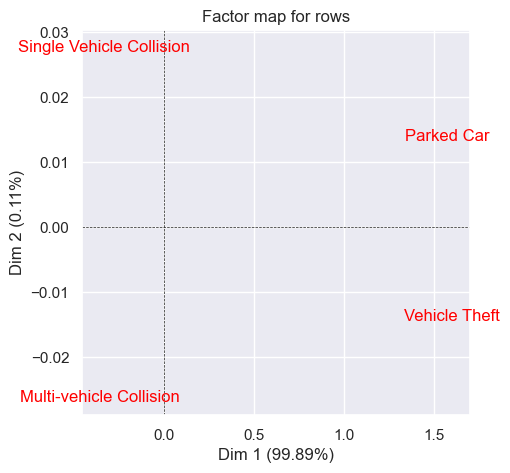

In [41]:
afc.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(5,5))

- La proximité entre les groupes d'incidents "parked car" et "vehicule theft" suggère que les assurés touchés par ces deux types d'accident ont les mêmes conséquences. Par exemple, cela pourrait indiquer que les assurés qui font l'accident de type Parking Car ont les mêmes conséquences que ceux qui font l'accident de type Véhicule Theft.
- Il y a des différences très marquées dans les gravités d'accident entre les assurés qui font d'accident  du type "Multi-vehicle Collision'" et les assurés qui font l'accident du type "Parked Car'" (les deux sont très loin entre eux). Cela suggère que la gravité des accidents de deux types est très différente.
- Il y a des différences très marquées dans les gravités d'accident entre les assurés qui font d'accident  du type "vehicule theft" et les assurés qui font l'accident du type "single vehicule collision'" (les deux sont très loin entre eux). Cela suggère que la gravité des accidents de deux types est très différente.


## Graphique des candidats (profil colonne)

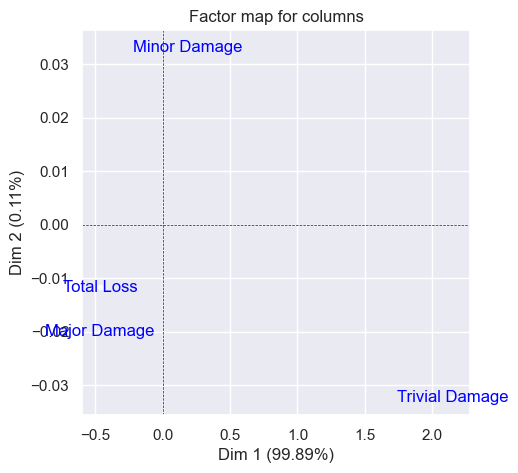

In [42]:
afc.mapping_col(num_x_axis=1,num_y_axis=2,figsize=(5,5))

# intrepretation :
- la modalité "Total Loss " est du côté négative  du profil colonne, cela suggère que les assurées qui ont gravité  comme "Total Losss" sont associés négativement à cette dimension(dimension 1).
- la modalité "Minor Dammage " est du côté positive du profil colonne, cela suggère que les assurées qui ont gravité d'accident comme "Minor Dammage" sont associés positivement à cette dimension(dimension 2).
- La proximité entre les catégories 'Total loss' et 'Major Damage' indique que les assurés ayant ces deux niveaux de gravité partagent les mêmes types d'accidents.
- La distance importante entre les deux gravités('Total loss' et 'Major Damage') et les autres gravités indique une grande difference  ou les comportements des individus représentés par ces modalités.
- la grande distance entre les catégories de gravité d'accident ('Total loss', 'Major Damage'),'Minor Dammege et 'Trivial damage' indique que ces catégories sont très distinctes en termes de types d'accidents

## Graphique superposition des profils lignes et colonnes

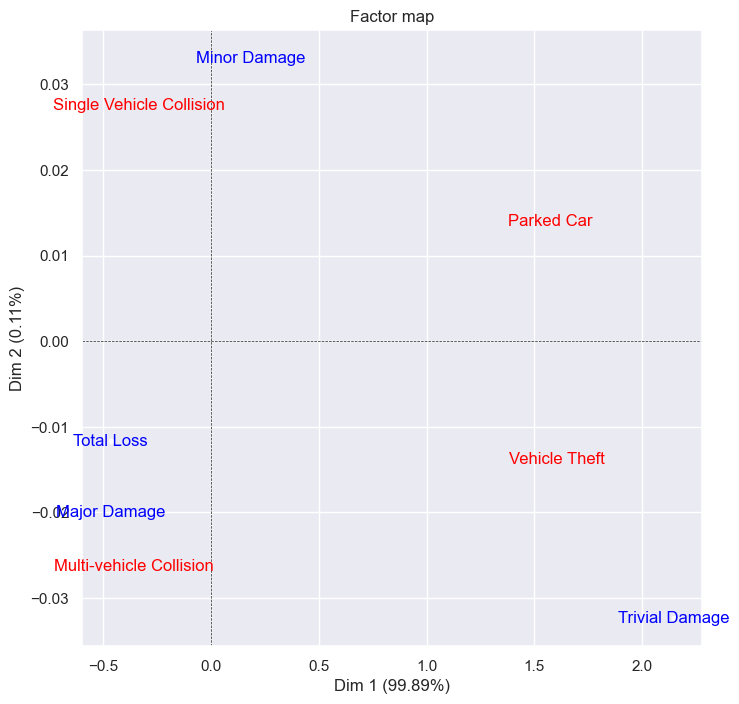

In [43]:
afc.mapping(1, 2, figsize=(8, 8))

# intrepretation :
- La proximité de la catégorie "major damage" avec celle de "multi-vehicule colission" suggère que les assurés qui ont un accident de type "multi-vehcule colission" ont pour conséquence de subir du "major damage".

- La proximité de la catégorie "total loss" avec celle de "multi-vehicule colission" suggère que les assurés qui ont un accident de type "multi-vehcule colission" ont pour conséquence de subir du "total loss". 

- La proximité de la catégorie "minor damage" avec celle de "single-vehicule colission" suggère que les assurés qui ont un accident de type "single-vehcule colission" ont pour conséquence de subir du "minor damage".

- La proximité de la catégorie "trivial damage" avec celle de "vehicule theft" suggère que les assurés qui ont un accident de type "vehicule theft" ont pour conséquence de subir du "trivial damage".

# Préparation des données pour l'analyse des correspondances multiples

In [44]:
data_acm = data.loc[:, ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'incident_severity', 'incident_city', 'police_report_available', 'auto_make', 'fraud_reported']]

# Discrétisation de la variable total_claim_amount
# Définition des intervalles pour la discrétisation
bins = [0, 30000, 60000, 90000, 120000]  # Définissez les bornes des intervalles selon vos besoins
# Étiquettes pour les intervalles
labels = ['< 30k', '30k - 60k', '60k - 90k', '> 90k']  # Définissez les étiquettes pour chaque intervalle
# Discrétisation de la variable total_claim_amount
data_acm['claim_amount_category'] = pd.cut(data['total_claim_amount'], bins=bins, labels=labels)


## Application de la méthode mca

In [45]:
#Création de l'objet mca
mca = prince.MCA()
#Lancement de l'ACM sur le jeu de données
mca=mca.fit(data_acm)

Text(0, 0.5, 'Component 1 (2.67% inertia)')

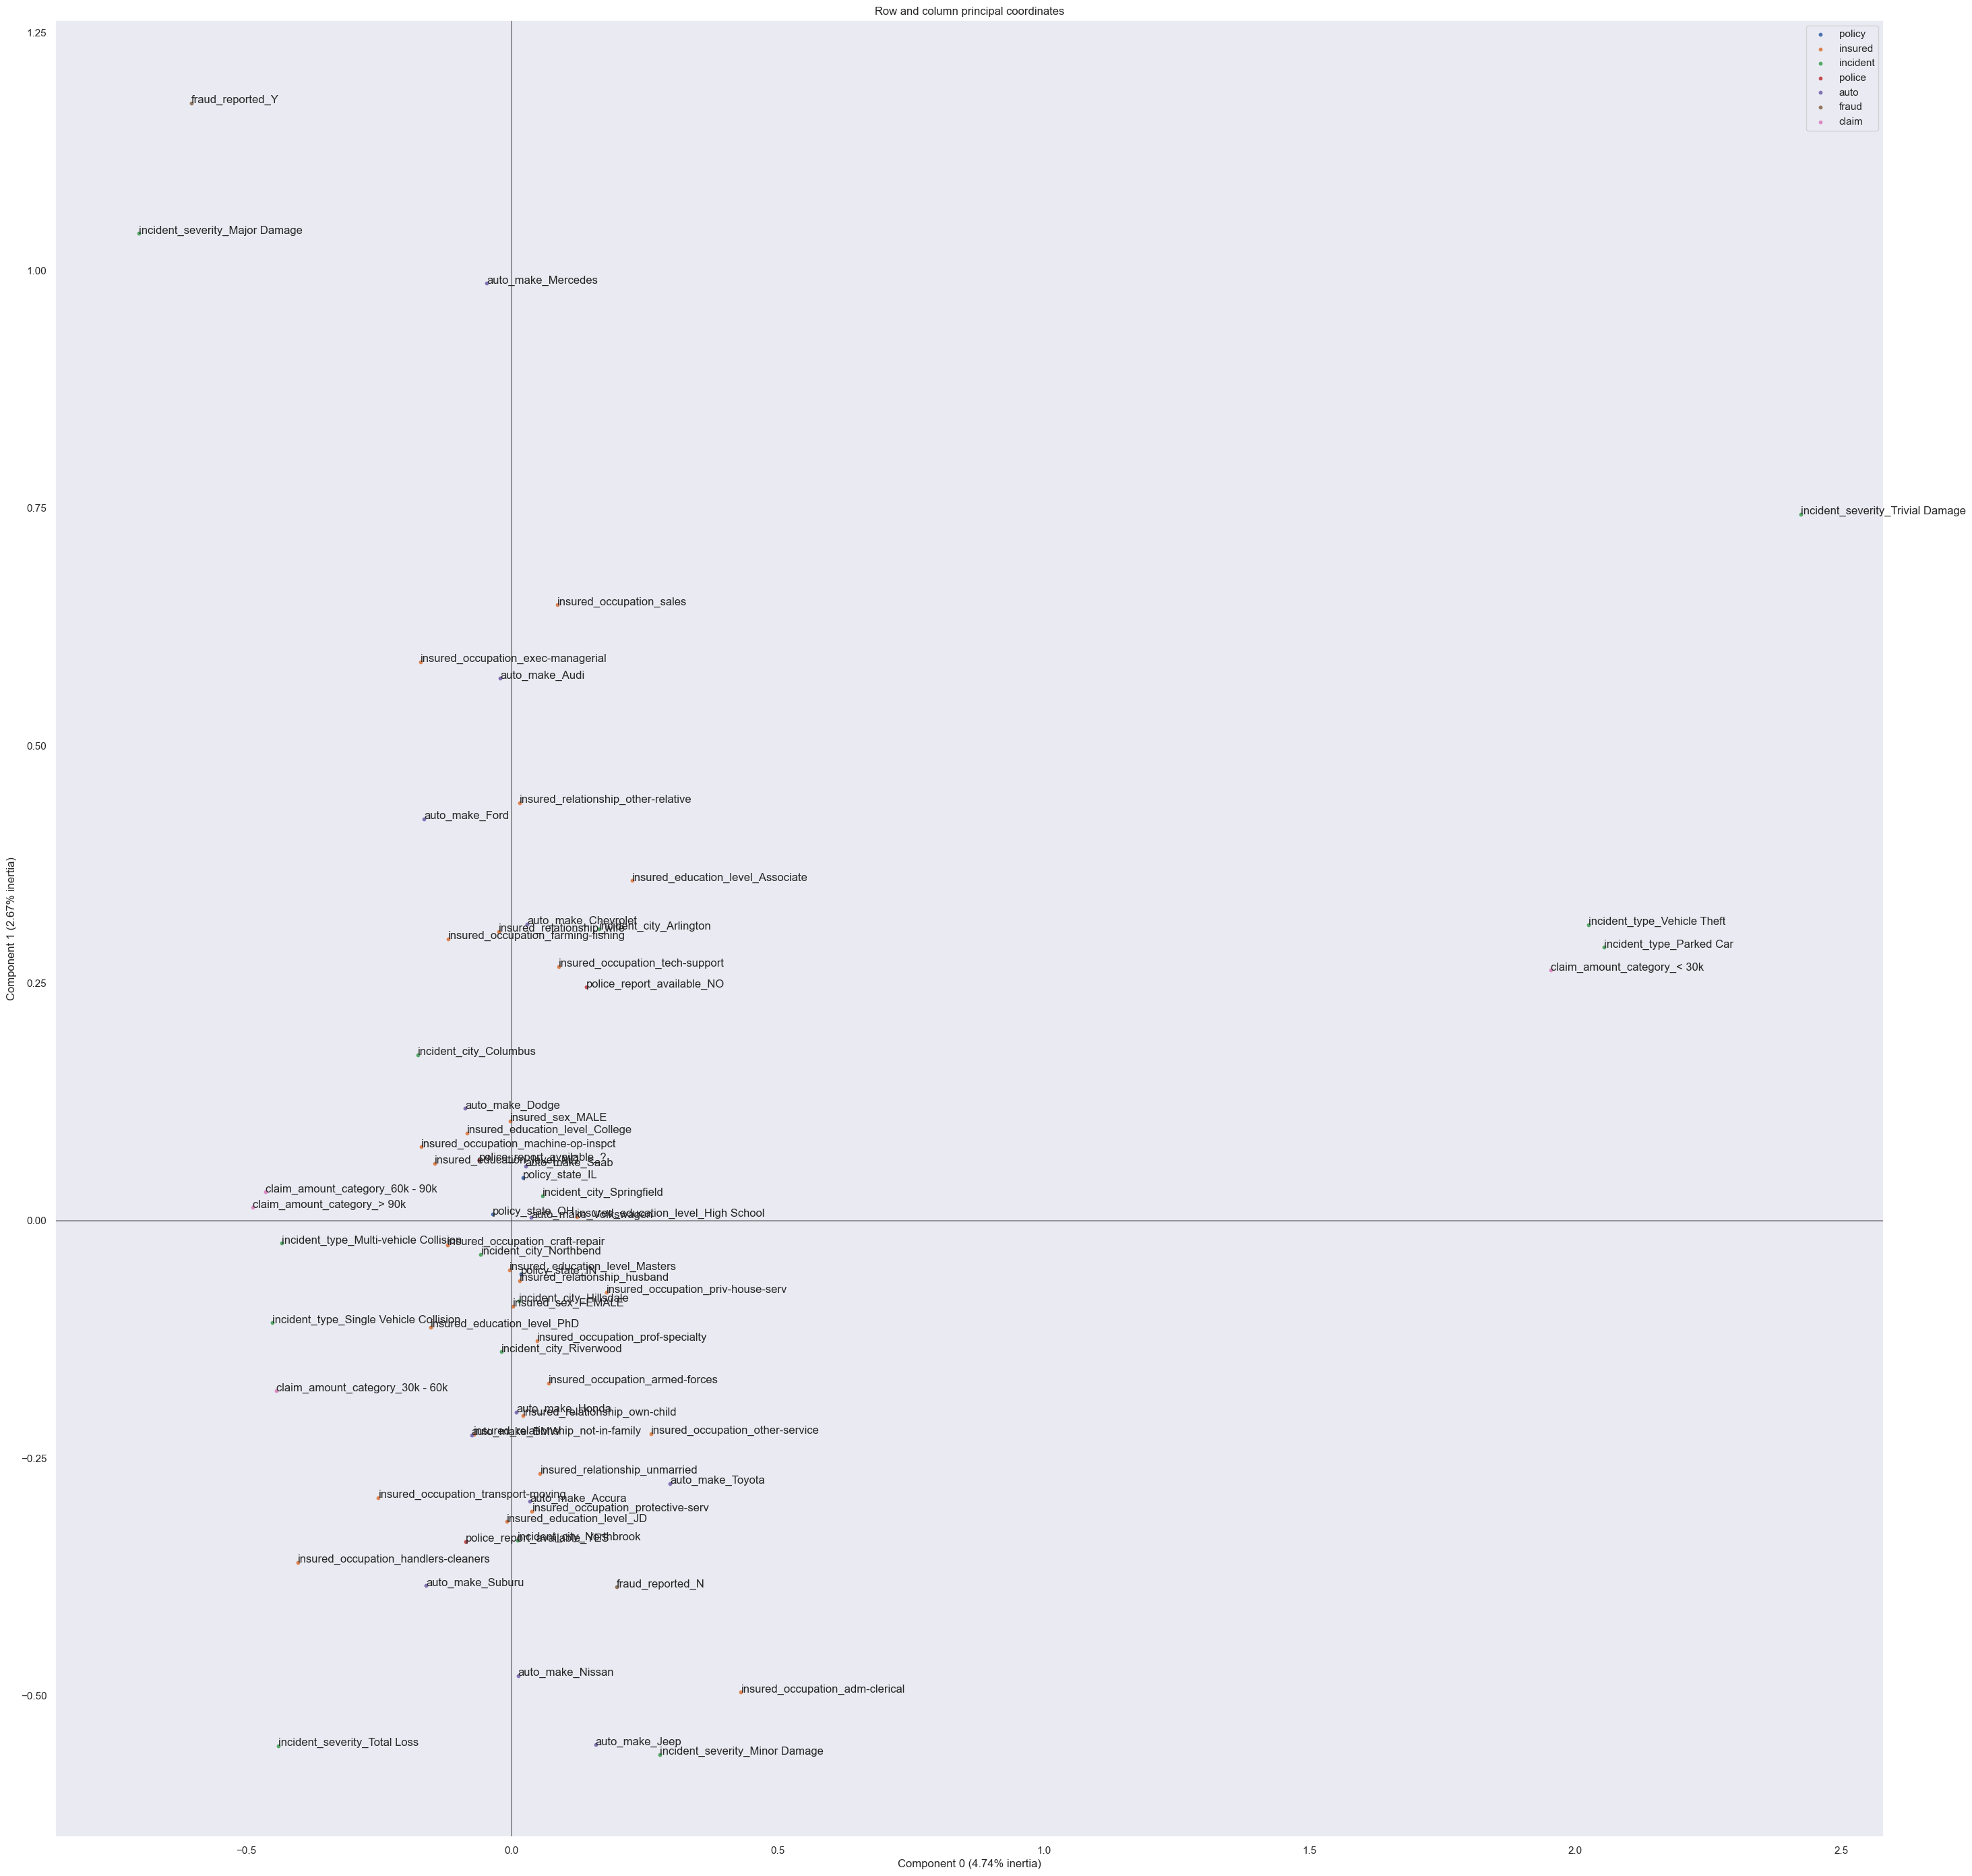

In [46]:
# Création de la figure

fig, ax = plt.subplots(figsize=(35, 35))

#Tracage des axes
ax = plot.stylize_axis(ax)

#Profils colonnes
col_coords = mca.column_coordinates(data_acm)
x = col_coords[0]
y = col_coords[1]

#Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

#Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=10, label=prefix)

    for i, label in enumerate(col_coords[mask].index):
        ax.annotate(label, (x[mask][i], y[mask][i]))

#Ajout de légende
ax.legend()
            
ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))


# interprétations : 
## proximité à l'origine :

-  les modalités 'insured_education_level_PhD', 'auto_make_Dodge','policy_state_IL','insured_relationship_husband' et 'claim_amount_category_60k-90k' sont proches de l'origine, ce qui indique qu'elles sont fréquentes, cela pourrait signifier que ces modalités sont représentatives d'un grand nombre d'individus ou qu'elles ont une occurrence élevée parmi les observations.
- les modalitées 'fraud_reported_Y', 'incident_severity_Major_Damage', 'incident_severity_Trivial_Damage', 'incident_type_vehicle_Theft', 'claim_amount_category_<30k', 'incident_type_parked_Car', ''incident_severity_Total_Loss', sont éloignées de l'origine, Cela suggère qu'elles sont rares dans les données par rapport aux autres modalitées.

## proximité entre les modalitées : 

Dans une analyse des correspondances multiples (ACM), les proximités entre les catégories des différentes variables peuvent indiquer des associations ou des similitudes dans les données. Les approximations que vous avez remarquées suggèrent des associations entre les catégories mentionnées. Voici comment interpréter ces approximations :

1. **'fraud_reported_Y' et 'incident_severity_Major_Damage'** :
   Cette approximation pourrait signifier que les cas de fraude signalés sont plus susceptibles de concerner des accidents graves ou des dommages importants aux véhicules.

2. **'claim_amount_category_<30k' et 'incident_type_parked_Car'** :
   Cette approximation peut indiquer que les réclamations pour des montants plus faibles sont plus susceptibles d'être liées à des accidents survenus lorsque le véhicule était stationné, ce qui pourrait inclure des incidents tels que des coups de portière ou des accrochages dans un parking.

3. **'incident_city_Northbrook' et 'auto_make_BMW' et 'insured_relationship_own-child'** :
   Cette approximation  pourrait indiquer que dans la ville de Northbrook, les accidents impliquant des voitures de marque BMW sont plus susceptibles de concerner des assurés qui sont des enfants du titulaire de la police. Cela pourrait potentiellement refléter des caractéristiques démographiques ou des schémas de conduite spécifiques à cette région et à ce groupe d'assurés.

## les dimensions :

- les modalitées 'claim_amount_category_<30k', 'incident_type_parked_Car' et 'incident_type_Vehicle_Theft' sont plus importantes dans la définition de la première dimension.
Tandis que pour la deuxième dimension les modalités qui contribuent au plus sont "auto_make_Mercedes", "fraud_reported_Y" et "incident_severity_Major_Damage"

## l'inertie : 
- les pourcentage dans les axes sont faibles car on a beaucoups de modalitées.

In [47]:
#résumer les valeurs propres (eigenvalues) obtenues à partir d'une ACM en utilisant la méthode des valeurs singulières
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.229,4.74%,4.74%
1,0.129,2.67%,7.41%


ces chiffres indiquent la contribution de chaque composante principale à l'explication de la variation des données dans l'analyse des correspondances multiples (ACM).

- La première composante principale explique environ 4.74% de la variation totale des données, ce qui en fait une composante significative dans la capture de la structure des données.
  
- La deuxième composante principale explique environ 2.68% de la variation totale, ce qui représente une part moins importante de la variation mais qui contribue également à la compréhension de la structure des données.

Ces pourcentages cumulés montrent que les deux premières composantes principales combinées expliquent environ 7.42% de la variation totale, ce qui indique que la majorité de la variation des données reste à expliquer, mais que les premières composantes principales sont importantes pour comprendre la structure des données.

## Contributions des modalitées dans la définition de chaque composante

### composante 0

In [48]:
sorted_contributions_0 = mca.column_contributions_.sort_values(by=0, ascending=False)
sorted_contributions_0.head().style.format('{:.0%}')

,0,1
claim_amount_category_< 30k,26%,1%
incident_severity_Trivial Damage,19%,3%
incident_type_Vehicle Theft,14%,1%
incident_type_Parked Car,13%,0%
incident_severity_Major Damage,5%,19%


### Composante 1 

In [49]:
sorted_contributions_1 = mca.column_contributions_.sort_values(by=1, ascending=False)
sorted_contributions_1.head().style.format('{:.0%}')

,0,1
fraud_reported_Y,3%,22%
incident_severity_Major Damage,5%,19%
fraud_reported_N,1%,7%
incident_severity_Minor Damage,1%,7%
incident_severity_Total Loss,2%,6%


 Les pourcentages de contribution pour les deux premières composantes principales indiquent l'importance des catégories de variables dans la capture de la variation des données dans l'analyse des correspondances multiples (ACM).

- Pour la première composante principale (0), les catégories qui contribuent le plus sont :
  - `claim_amount_category_< 30k` avec 26% : Cette catégorie est fortement associée à la première composante principale.
  - `incident_severity_Trivial Damage` avec 19% : Cette catégorie contribue également de manière significative à la première composante principale.

- Pour la deuxième composante principale (1), les catégories qui contribuent le plus sont :
    -  `fraud_reported_Y` avec 23% : Cette catégorie est fortement associée à la deuxième composante principale.
  - `incident_severity_Major Damage` avec 20% : Cette catégorie contribue également de manière signific

En résumé, ces pourcentages de contribution indiquent quelles catégories de variables ont le plus d'impact sur chaque composante principale, ce qui nous aide à comprendre les dimensions principales qui structurent les données dans l'analyse ACM.


# **Comment identifier les caractéristiques qui permettent de discriminer entre les clients ayant des réclamations élevées, moyennes et faibles dans le secteur de l'assurance automobile**

In [75]:
np.set_printoptions(precision=4)
from sklearn.preprocessing import LabelEncoder

# Ensure bins and labels are defined before use
bins = [0, 30000, 60000, 120000]  # Define the intervals for discretization
labels = ["Faible", "Moyen", "Élevé"]  # Define the labels for the categories

# Example target variable `y` (replace this with your actual data)
# y = ...

# Copy the original data
AFD_data = X1.copy()

# Create a new column in AFD_data with the discretized claim categories
AFD_data["claim_category"] = pd.cut(data["total_claim_amount"], bins=bins, labels=labels, right=False)

# Check the distribution of the new 'claim_category' column
print(AFD_data["claim_category"].value_counts())

# Encode the claim categories
label_encoder = LabelEncoder()
y_AFD = label_encoder.fit_transform(AFD_data["claim_category"])

# Check the encoded values and their distribution
print(np.unique(y_AFD, return_counts=True))

Élevé     461
Moyen     350
Faible    189
Name: claim_category, dtype: int64
(array([0, 1, 2]), array([189, 350, 461], dtype=int64))


In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y_AFD)
lda.explained_variance_ratio_


array([9.9901e-01, 9.8825e-04])

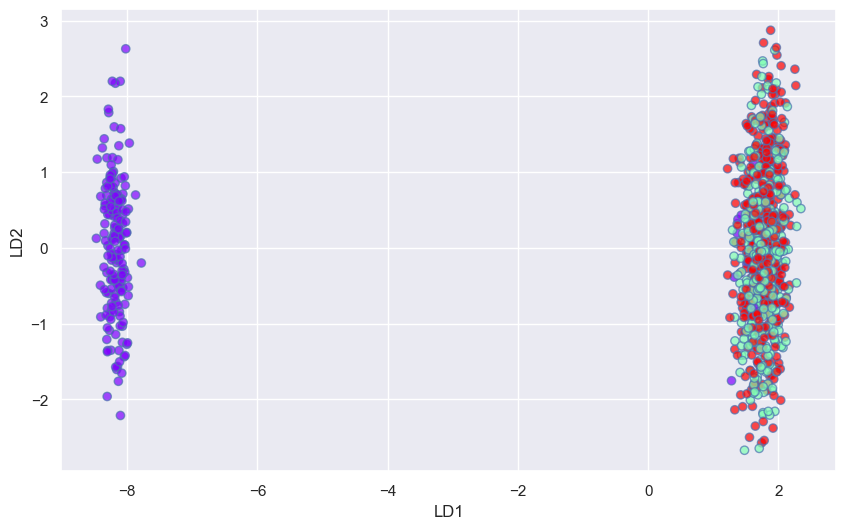

In [80]:
plt.figure(figsize=(10, 6)) 
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_AFD,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


In [67]:
print(X_lda.shape)

(1000, 0)
